<a href="https://colab.research.google.com/github/sumaiya008/CCNY-DSE-Capstone-Project-Segmenting-Coral-Branch-tips/blob/main/notebooks/1.2_Subdividing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import random
import pickle
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets
2023-10-23 00:19:57.167063: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
with open('../data/external/data_vgg16.pkl','rb') as f:
    X_train,y_train,X_test,y_test = pickle.load(f)
    
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1276, 224, 224, 3)
y_train shape: (1276,)
X_test shape: (319, 224, 224, 3)
y_test shape: (319,)


In [4]:
# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest',
    rescale=1.0 / 255  # Add normalization here
)

In [5]:
# Apply data augmentation to the training set
X_train_augmented = []
y_train_augmented = []
for i in range(X_train.shape[0]):
    img = X_train[i]
    label = y_train[i]
    for j in range(3):
        x_augmented = datagen.random_transform(img)
        X_train_augmented.append(x_augmented)
        y_train_augmented.append(label)

In [6]:
# Apply data augmentation to the test set
X_test_augmented = []
y_test_augmented = []
for i in range(X_test.shape[0]):
    img = X_test[i]
    label = y_test[i]
    for j in range(3):
        x_augmented = datagen.random_transform(img)
        X_test_augmented.append(x_augmented)
        y_test_augmented.append(label)

In [7]:
# Convert the augmented data to numpy arrays
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)
X_test_augmented = np.array(X_test_augmented)
y_test_augmented = np.array(y_test_augmented)

In [8]:
# Save the augmented data to files
np.savez_compressed('../data/external/coral_augmented_vgg16.npz',
                    X_train=X_train_augmented,
                    y_train=y_train_augmented,
                    X_test=X_test_augmented,
                    y_test=y_test_augmented)

In [9]:
# Load the augmented data from the saved file
data = np.load('../data/external/coral_augmented_vgg16.npz')

# Access the arrays from the loaded data
X_train_augmented = data['X_train']
y_train_augmented = data['y_train']
X_test_augmented = data['X_test']
y_test_augmented = data['y_test']

# Check the shape of the loaded data
print("X_train_augmented shape:", X_train_augmented.shape)
print("y_train_augmented shape:", y_train_augmented.shape)
print("X_test_augmented shape:", X_test_augmented.shape)
print("y_test_augmented shape:", y_test_augmented.shape)

X_train_augmented shape: (3828, 224, 224, 3)
y_train_augmented shape: (3828,)
X_test_augmented shape: (957, 224, 224, 3)
y_test_augmented shape: (957,)


In [10]:
# Combine the data
X_train_combined = np.concatenate((X_train, X_train_augmented), axis=0)
y_train_combined = np.concatenate((y_train, y_train_augmented), axis=0)
X_test_combined = np.concatenate((X_test, X_test_augmented), axis=0)
y_test_combined = np.concatenate((y_test, y_test_augmented), axis=0)

# Check the shape of the combined data
print(f'X_train_combined shape: {X_train_combined.shape}')
print(f'y_train_combined shape: {y_train_combined.shape}')
print(f'X_test_combined shape: {X_test_combined.shape}')
print(f'y_test_combined shape: {y_test_combined.shape}')

X_train_combined shape: (5104, 224, 224, 3)
y_train_combined shape: (5104,)
X_test_combined shape: (1276, 224, 224, 3)
y_test_combined shape: (1276,)


In [11]:
# Save the augmented data to files
np.savez_compressed('../data/external/coral_augmented_combined_vgg16.npz',
                    X_train=X_train_combined,
                    y_train=y_train_combined,
                    X_test=X_test_combined,
                    y_test=y_test_combined)

In [2]:
# Load the augmented data from the saved file
data = np.load('../data/external/coral_augmented_combined_vgg16.npz')

# Access the arrays from the loaded data
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']

# Check the shape of the loaded data
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5104, 224, 224, 3)
y_train shape: (5104,)
X_test shape: (1276, 224, 224, 3)
y_test shape: (1276,)


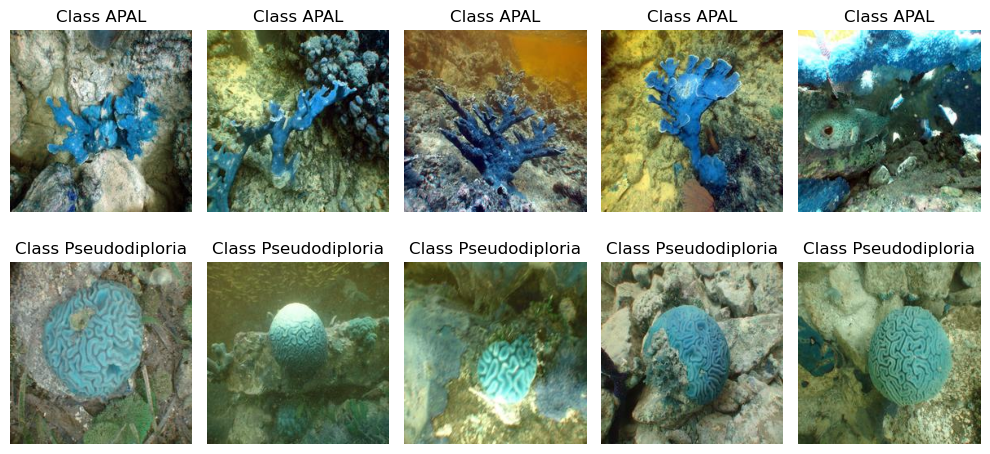

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of images to display for each class
num_images_per_class = 5

# Get unique class labels from y_train
unique_classes = np.unique(y_train)

# Initialize a variable to keep track of displayed images
images_displayed_per_class = {label: 0 for label in unique_classes}

# Create a figure to display the images
fig, axes = plt.subplots(len(unique_classes), num_images_per_class, figsize=(10, 5))

# Loop through the X_train and y_train to display the images
for i in range(len(X_train)):
    label = y_train[i]
    if images_displayed_per_class[label] < num_images_per_class:
        ax = axes[np.where(unique_classes == label)[0][0], images_displayed_per_class[label]]
        # Normalize the image to the [0, 1] range
        normalized_image = X_train[i] / 255.0
        ax.imshow(normalized_image)
        ax.axis('off')
        ax.set_title(f"Class {label}")
        images_displayed_per_class[label] += 1
    if all(value >= num_images_per_class for value in images_displayed_per_class.values()):
        break

# Display the plot
plt.tight_layout()
plt.show()


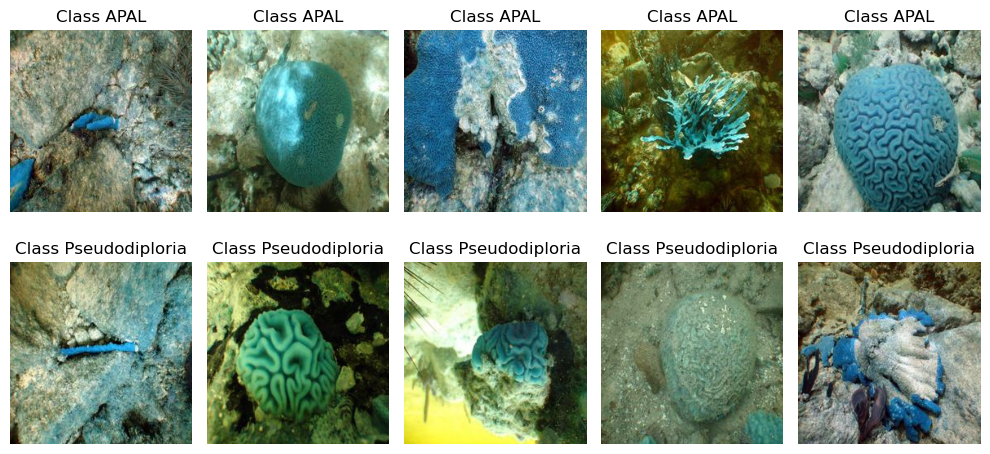

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Define the number of images to display for each class
num_images_per_class = 5

# Get unique class labels from y_train
unique_classes = np.unique(y_test)

# Initialize a variable to keep track of displayed images
images_displayed_per_class = {label: 0 for label in unique_classes}

# Create a figure to display the images
fig, axes = plt.subplots(len(unique_classes), num_images_per_class, figsize=(10, 5))

# Loop through the X_train and y_train to display the images
for i in range(len(X_test)):
    label = y_train[i]
    if images_displayed_per_class[label] < num_images_per_class:
        ax = axes[np.where(unique_classes == label)[0][0], images_displayed_per_class[label]]
        # Normalize the image to the [0, 1] range
        normalized_image = X_test[i] / 255.0
        ax.imshow(normalized_image)
        ax.axis('off')
        ax.set_title(f"Class {label}")
        images_displayed_per_class[label] += 1
    if all(value >= num_images_per_class for value in images_displayed_per_class.values()):
        break

# Display the plot
plt.tight_layout()
plt.show()
